# Regresión Lineal


<p style='text-align: justify;'>Este modelo nos permite encontrar la relación que existe entre una variable dependiente y una independiente, así como predecir el valor esperado de una variable aleatoria y cuando x toma un valor especifico.</p>  
<p style='text-align: justify;'>Este método implica suponer que alguna función de la recta de forma y=mx+b es la representación mas adecuada de la distribución de los datos en un diagrama de dispersión. En un mundo ideal, todos los puntos del diagrama de dispersión se alinearían en una sola línea recta perfecta sin la necesidad de encontrar la recta que resume los datos ya que solo bastaría con unir dichos puntos, sin embargo, la realidad no es así, típicamente en los conjuntos de datos de los diagramas de dispersión se puede trazar mas de una línea recta y cada una de estas líneas dará un ajuste diferente al conjunto de datos, se trata entonces de encontrar la línea recta que brinde el mayor ajuste.</p>   

In [1]:
from sklearn.datasets import load_boston

# Cargamos un conjunto de datos
boston_dataset = load_boston()
# Se carga con pandas para tratamiento posterior
import pandas as pd
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# Agregamos la variable de respuesta
df['MEDV'] = boston_dataset.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

## Regresión con una variable

In [3]:
# Preparamos datos
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [4]:
#Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [5]:
from sklearn.linear_model import LinearRegression
#Creando el modelo y entrenando
reg = LinearRegression().fit(X_train,y_train)
#Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train)
#Prediciendo valores de validación
y_test_hat = reg.predict(X_test)

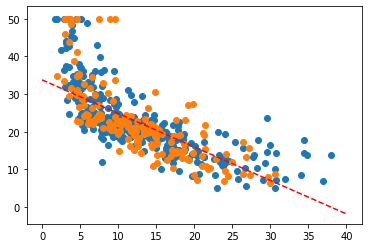

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Le decimos a jupyter que grafique en  el cuaderno
%matplotlib inline
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(0,40).reshape(-1, 1)
# Con el modelo predecimos X_plot
y_plot = reg.predict(X_plot)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--")

In [7]:
# Calculamos el  error
from sklearn.metrics import r2_score
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.5472683211519955
Prueba 0.5330003840140723


## Regresión Multiple

En la regresión lineal buscamos predecir una variable de respuesta a partir de una variable independiente. Es natural pensar que pasaría si intentamos utilizar múltiples variables independientes en el mismo modelo.

In [8]:
# Preparación de datos iniciales
X = df[["RM","AGE"]] # aqui ya no necesitamos hacer un reshape pues ya tenemos el número de lineas y columnas definidas
y = df["MEDV"].values.reshape(-1, 1)

# Hacemos un split de 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Se entrena el modelo
reg = LinearRegression().fit(X_train,y_train)

# Hacemos las  predicciones
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.5480820218090987
Prueba 0.49742229782888503


El $R^2$ en entrenamiento subio pero en validación bajo. Probemos  con una variable mas significativa como LSTAT.

¿Y con el conjunto de datos completo?

---

La regresión lineal es de los modelos mas "simples" de utilizar.

La regresión multiple es una extensión de la regresión lineal.

La selección  de variables es un actividad muy importante a la  hora de contruir modelos predictivos.

In [9]:
# Preparación de datos iniciales
X = df[["LSTAT","AGE"]] # aqui ya no necesitamos hacer un reshape pues ya tenemos el número de lineas y columnas definidas
y = df["MEDV"].values.reshape(-1, 1)

# Hacemos un split de 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Se entrena el modelo
reg = LinearRegression().fit(X_train,y_train)

# Hacemos las  predicciones
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.5520920948986159
Prueba 0.5426647322726055


In [10]:
# Preparación de datos iniciales
X = df[["RM","AGE"]] # aqui ya no necesitamos hacer un reshape pues ya tenemos el número de lineas y columnas definidas
y = df["MEDV"].values.reshape(-1, 1)

# Hacemos un split de 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Se entrena el modelo
reg = LinearRegression().fit(X_train,y_train)

# Hacemos las  predicciones
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.5480820218090987
Prueba 0.49742229782888503


In [11]:
# Preparación de datos iniciales
X = df[["RM","LSTAT"]] # aqui ya no necesitamos hacer un reshape pues ya tenemos el número de lineas y columnas definidas
y = df["MEDV"].values.reshape(-1, 1)

# Hacemos un split de 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Se entrena el modelo
reg = LinearRegression().fit(X_train,y_train)

# Hacemos las  predicciones
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.6453978719945987
Prueba 0.6204753894496777


In [13]:
# Preparación de datos iniciales
X = df.drop("MEDV", axis= 1) # AHORA VAMOS A COGER TODAS LAS VARIABLES MENOR MEDV QUE LO SACAMOS CON UN .drop 
                          # indicadole que son con columna con axis = 1

y = df["MEDV"].values.reshape(-1, 1)

# Hacemos un split de 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Se entrena el modelo
reg = LinearRegression().fit(X_train,y_train)

# Hacemos las  predicciones
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.7581323045862294
Prueba 0.6975641751193851


In [15]:
# Preparación de datos iniciales
X = df.drop(["MEDV","CHAS"], axis= 1) # AHORA VAMOS A COGER TODAS LAS VARIABLES MENOR MEDV QUE LO SACAMOS CON UN .drop 
                          # indicadole que son con columna con axis = 1

y = df["MEDV"].values.reshape(-1, 1)

# Hacemos un split de 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Se entrena el modelo
reg = LinearRegression().fit(X_train,y_train)

# Hacemos las  predicciones
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.7522680521704354
Prueba 0.6944820133786179
